In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./data/processed/Somalia_Government_Finances_2013_2024.csv')

In [4]:
data.duplicated().sum()

11

In [5]:
data.drop_duplicates()

,standardname,state,year,month,period,main,costcentermain,costcentermaindesc,name1,name3,...,gfs2,gfs3,gfs4,gfs2desc,gfs3desc,gfs4desc,originalbudget,totalbudget,actual,year_1
0,dbSomaliaFgsRevExp,fgs,2013,Dec,2013-12,Revenue,0.0,NaN,0.0,0.0,...,11.0,111.0,1111.0,Taxes,"Taxes on income, profits, and capital gains",Payable by individuals,236173,236173,688887.3865,2013
1,dbSomaliaFgsRevExp,fgs,2013,Dec,2013-12,Revenue,0.0,NaN,0.0,0.0,...,11.0,111.0,1111.0,Taxes,"Taxes on income, profits, and capital gains",Payable by individuals,590400,590400,NaN,2013
2,dbSomaliaFgsRevExp,fgs,2013,Dec,2013-12,Revenue,0.0,NaN,0.0,0.0,...,11.0,111.0,1111.0,Taxes,"Taxes on income, profits, and capital gains",Payable by individuals,1953000,1953000,NaN,2013
3,dbSomaliaFgsRevExp,fgs,2013,Dec,2013-12,Revenue,0.0,NaN,0.0,0.0,...,11.0,111.0,1112.0,Taxes,"Taxes on income, profits, and capital gains",Payable by corporations and other enterprises,-,-,NaN,2013
4,dbSomaliaFgsRevExp,fgs,2013,Dec,2013-12,Revenue,0.0,NaN,0.0,0.0,...,11.0,111.0,1112.0,Taxes,"Taxes on income, profits, and capital gains",Payable by corporations and other enterprises,-,-,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173638,dbSomaliaFgsRevExp,fgs,2024,Dec,2024-12-01 00:00:00,Expense,4.0,Social,4.0,405.0,...,22.0,221.0,2213.0,Use of goods and services,General operating expenses,"Fuel, oil and lubricants",NaN,NaN,NaN,2024
173639,dbSomaliaFgsRevExp,fgs,2024,Dec,2024-12-01 00:00:00,Expense,4.0,Social,4.0,405.0,...,22.0,221.0,2214.0,Use of goods and services,General operating expenses,Office materials and supplies,20000.0,20000.0,NaN,2024
173640,dbSomaliaFgsRevExp,fgs,2024,Dec,2024-12-01 00:00:00,Expense,4.0,Social,4.0,405.0,...,22.0,221.0,2214.0,Use of goods and services,General operating expenses,Office materials and supplies,NaN,NaN,NaN,2024
173641,dbSomaliaFgsRevExp,fgs,2024,Dec,2024-12-01 00:00:00,Expense,4.0,Social,4.0,405.0,...,22.0,221.0,2215.0,Use of goods and services,General operating expenses,Repairs and maintenance,1416.0,1416.0,NaN,2024


In [6]:
# Define the columns to keep and their new simple, clear names
columns_to_keep = {
    'year': 'year',
    'month': 'month', 
    'period': 'fiscal_date', 
    'main': 'transaction_type',  # Revenue or Expenditure
    'costcentermaindesc': 'government_department',
    'name5desc': 'economic_category',  # Type of revenue or expenditure
    'obj4desc': 'funding_source',  # Specific source of tax or funds
    'obj6desc': 'payer_or_recipient',  # Who is paying or receiving the money
    'gfs2desc': 'gfs_classification_level_2', 
    'gfs3desc': 'gfs_classification_level_3',
    'gfs4desc': 'gfs_classification_level_4',
    'originalbudget': 'planned_budget',
    'totalbudget': 'final_budget', 
    'actual': 'actual_expenditure_or_revenue', 
}

# Select and rename columns
data = data[list(columns_to_keep.keys())].rename(columns=columns_to_keep)


In [7]:
data.head()

,year,month,fiscal_date,transaction_type,government_department,economic_category,funding_source,payer_or_recipient,gfs_classification_level_2,gfs_classification_level_3,gfs_classification_level_4,planned_budget,final_budget,actual_expenditure_or_revenue
0,2013,Dec,2013-12,Revenue,NaN,NaN,NaN,NaN,Taxes,"Taxes on income, profits, and capital gains",Payable by individuals,236173,236173,688887.3865
1,2013,Dec,2013-12,Revenue,NaN,NaN,NaN,NaN,Taxes,"Taxes on income, profits, and capital gains",Payable by individuals,590400,590400,NaN
2,2013,Dec,2013-12,Revenue,NaN,NaN,NaN,NaN,Taxes,"Taxes on income, profits, and capital gains",Payable by individuals,1953000,1953000,NaN
3,2013,Dec,2013-12,Revenue,NaN,NaN,NaN,NaN,Taxes,"Taxes on income, profits, and capital gains",Payable by corporations and other enterprises,-,-,NaN
4,2013,Dec,2013-12,Revenue,NaN,NaN,NaN,NaN,Taxes,"Taxes on income, profits, and capital gains",Payable by corporations and other enterprises,-,-,NaN


In [8]:
data.isna().sum()

year                                  0
month                                 0
fiscal_date                           0
transaction_type                   2245
government_department             11456
economic_category                 23547
funding_source                    13455
payer_or_recipient                88239
gfs_classification_level_2         1262
gfs_classification_level_3         1466
gfs_classification_level_4         2691
planned_budget                    84924
final_budget                      83556
actual_expenditure_or_revenue    112038
dtype: int64

In [9]:
data.isna().sum()/len(data) *100

year                              0.000000
month                             0.000000
fiscal_date                       0.000000
transaction_type                  1.292883
government_department             6.597444
economic_category                13.560581
funding_source                    7.748657
payer_or_recipient               50.816330
gfs_classification_level_2        0.726779
gfs_classification_level_3        0.844261
gfs_classification_level_4        1.549731
planned_budget                   48.907241
final_budget                     48.119417
actual_expenditure_or_revenue    64.522037
dtype: float64

array([[<Axes: title={'center': 'year'}>]], dtype=object)

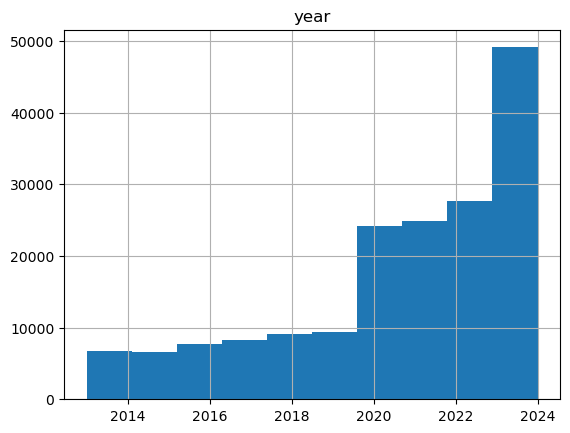

In [10]:
data.hist()

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Convert Date Column to Numeric Features
if 'date_column' in data.columns:  # Replace with your actual date column name
    data['date_column'] = pd.to_datetime(data['date_column'], errors='coerce')
    data['year'] = data['date_column'].dt.year
    data['month'] = data['date_column'].dt.month
    data.drop(columns=['date_column'], inplace=True)

# Separate Numerical and Categorical Columns
num_cols = data.select_dtypes(include=['number']).columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns

# 1️⃣ **Handle Missing Numerical Values (Median + Regression)**
for col in num_cols:
    if data[col].isnull().sum() > 0:
        # Use Median Imputation for skewed data
        median_value = data[col].median()
        data[col].fillna(median_value, inplace=True)
        
        # Use Predictive Imputation (Regression) where possible
        temp_data = data.dropna()  # Drop rows with any missing values
        X = temp_data.drop(columns=[col])  # Features
        y = temp_data[col]  # Target

        if X.shape[1] > 0:  # Ensure there are valid predictor columns
            model = LinearRegression()
            model.fit(X, y)
            missing_mask = data[col].isnull()
            if missing_mask.sum() > 0:
                data.loc[missing_mask, col] = model.predict(data.loc[missing_mask, X.columns])

# 2️⃣ **Handle Missing Categorical Values (Mode Imputation)**
for col in cat_cols:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0]  # Most frequent value
        data[col].fillna(mode_value, inplace=True)

# 3️⃣ **Handle Time-Series Gaps (Optional)**
data.fillna(method='ffill', inplace=True)  # Forward Fill
data.fillna(method='bfill', inplace=True)  # Backward Fill

# ✅ Final Check
print("Missing Values After Imputation:\n", data.isnull().sum())

Missing Values After Imputation:
 year                             0
month                            0
fiscal_date                      0
transaction_type                 0
government_department            0
economic_category                0
funding_source                   0
payer_or_recipient               0
gfs_classification_level_2       0
gfs_classification_level_3       0
gfs_classification_level_4       0
planned_budget                   0
final_budget                     0
actual_expenditure_or_revenue    0
dtype: int64


In [12]:
data

,year,month,fiscal_date,transaction_type,government_department,economic_category,funding_source,payer_or_recipient,gfs_classification_level_2,gfs_classification_level_3,gfs_classification_level_4,planned_budget,final_budget,actual_expenditure_or_revenue
0,2013,Dec,2013-12,Revenue,Administration,Ministry of Finance,Utilities,Stationary,Taxes,"Taxes on income, profits, and capital gains",Payable by individuals,236173,236173,688887.3865
1,2013,Dec,2013-12,Revenue,Administration,Ministry of Finance,Utilities,Stationary,Taxes,"Taxes on income, profits, and capital gains",Payable by individuals,590400,590400,-
2,2013,Dec,2013-12,Revenue,Administration,Ministry of Finance,Utilities,Stationary,Taxes,"Taxes on income, profits, and capital gains",Payable by individuals,1953000,1953000,-
3,2013,Dec,2013-12,Revenue,Administration,Ministry of Finance,Utilities,Stationary,Taxes,"Taxes on income, profits, and capital gains",Payable by corporations and other enterprises,-,-,-
4,2013,Dec,2013-12,Revenue,Administration,Ministry of Finance,Utilities,Stationary,Taxes,"Taxes on income, profits, and capital gains",Payable by corporations and other enterprises,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173638,2024,Dec,2024-12-01 00:00:00,Expense,Social,Somali Disable Agency,Fuel and Lubricants,Diesel and Oil,Use of goods and services,General operating expenses,"Fuel, oil and lubricants",12000.0,11000.0,-
173639,2024,Dec,2024-12-01 00:00:00,Expense,Social,Somali Disable Agency,Materials and Supplies,Stationary,Use of goods and services,General operating expenses,Office materials and supplies,20000.0,20000.0,-
173640,2024,Dec,2024-12-01 00:00:00,Expense,Social,Somali Disable Agency,Materials and Supplies,Stationary,Use of goods and services,General operating expenses,Office materials and supplies,12000.0,11000.0,-
173641,2024,Dec,2024-12-01 00:00:00,Expense,Social,Somali Disable Agency,Maintenance and Repairs,Stationary,Use of goods and services,General operating expenses,Repairs and maintenance,1416.0,1416.0,-


In [13]:
data.columns

Index(['year', 'month', 'fiscal_date', 'transaction_type',
       'government_department', 'economic_category', 'funding_source',
       'payer_or_recipient', 'gfs_classification_level_2',
       'gfs_classification_level_3', 'gfs_classification_level_4',
       'planned_budget', 'final_budget', 'actual_expenditure_or_revenue'],
      dtype='object')

In [14]:
# Replace '-' with NaN in numerical columns
data.replace("-", np.nan, inplace=True)

In [15]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load dataset (assuming data is already in a DataFrame called 'data')
# If not, load it using: data = pd.read_csv('your_data.csv')

# Step 1: Create an Original Index Column to Track Duplicates
data['original_index'] = data.index

# Step 2: Define Numerical and Categorical Columns
num_cols = ["planned_budget", "final_budget", "actual_expenditure_or_revenue"]
cat_cols = ["transaction_type", "government_department", "economic_category",
            "funding_source", "payer_or_recipient", "gfs_classification_level_2",
            "gfs_classification_level_3", "gfs_classification_level_4"]

# Step 3: Convert '-' and other placeholders to NaN
data.replace("-", np.nan, inplace=True)

# Step 4: Convert Numeric Columns to Proper Data Type
for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Step 5: Handle Missing Values
# Impute numerical columns using Median
numeric_imputer = SimpleImputer(strategy='median')
data[num_cols] = numeric_imputer.fit_transform(data[num_cols])

# Impute categorical columns using Mode
for col in cat_cols:
    if data[col].isnull().sum() > 0:
        mode_value = data[col].mode()[0]  # Most frequent category
        data[col].fillna(mode_value, inplace=True)

# Step 6: Check for Duplicates After Imputation
print(f"Duplicated rows after imputation: {data.duplicated().sum()}")

# Step 7: Handle Duplicates
duplicate_mask = data.duplicated()
if duplicate_mask.sum() > 0:
    print(f"Fixing {duplicate_mask.sum()} false duplicates caused by imputation.")

    # Get indices of duplicate rows
    duplicate_indices = data[duplicate_mask].original_index.tolist()

    # Add a small random noise to only numerical columns where needed
    for col in num_cols:
        if data.duplicated().sum() == 0:
            break  # Stop if duplicates are already resolved

        # Restore original values for non-missing data
        mask = data.index.isin(duplicate_indices) & (~data[col].isnull())
        data.loc[mask, col] = data.loc[mask, col]

        # Add slight random noise to truly missing values
        mask = data.index.isin(duplicate_indices) & (data[col].isnull())
        if mask.sum() > 0:
            noise = np.random.normal(0, 0.01, size=mask.sum())  # Small random variation
            data.loc[mask, col] = data.loc[mask, col] + noise

# Step 8: Drop Temporary Index Column
data.drop(columns=['original_index'], inplace=True)

# Step 9: Assign a Unique ID if Necessary
if data.duplicated().sum() > 0:
    print("Still some duplicates remaining. Assigning unique IDs to all rows.")

    # Create a unique whole-number index starting from 1 instead of 0
    data['unique_id'] = np.arange(1, len(data) + 1).astype(int)

# Step 10: Final Duplicate Check
print(f"Final duplicated rows count: {data.duplicated().sum()}")

# Save the cleaned data
# data.to_csv('cleaned_somalia_budget.csv', index=False)

Duplicated rows after imputation: 0
Still some duplicates remaining. Assigning unique IDs to all rows.
Final duplicated rows count: 0


In [16]:
data.head()

,year,month,fiscal_date,transaction_type,government_department,economic_category,funding_source,payer_or_recipient,gfs_classification_level_2,gfs_classification_level_3,gfs_classification_level_4,planned_budget,final_budget,actual_expenditure_or_revenue,unique_id
0,2013,Dec,2013-12,Revenue,Administration,Ministry of Finance,Utilities,Stationary,Taxes,"Taxes on income, profits, and capital gains",Payable by individuals,236173.0,236173.0,688887.3865,1
1,2013,Dec,2013-12,Revenue,Administration,Ministry of Finance,Utilities,Stationary,Taxes,"Taxes on income, profits, and capital gains",Payable by individuals,590400.0,590400.0,11665.8300,2
2,2013,Dec,2013-12,Revenue,Administration,Ministry of Finance,Utilities,Stationary,Taxes,"Taxes on income, profits, and capital gains",Payable by individuals,1953000.0,1953000.0,11665.8300,3
3,2013,Dec,2013-12,Revenue,Administration,Ministry of Finance,Utilities,Stationary,Taxes,"Taxes on income, profits, and capital gains",Payable by corporations and other enterprises,12000.0,11000.0,11665.8300,4
4,2013,Dec,2013-12,Revenue,Administration,Ministry of Finance,Utilities,Stationary,Taxes,"Taxes on income, profits, and capital gains",Payable by corporations and other enterprises,12000.0,11000.0,11665.8300,5


In [17]:
data.duplicated().sum()

0

In [18]:
# data.to_csv('cleaned_somalia_budget.csv', index=False)

In [19]:
data.sample

<bound method NDFrame.sample of         year month          fiscal_date transaction_type  \
0       2013   Dec              2013-12          Revenue   
1       2013   Dec              2013-12          Revenue   
2       2013   Dec              2013-12          Revenue   
3       2013   Dec              2013-12          Revenue   
4       2013   Dec              2013-12          Revenue   
...      ...   ...                  ...              ...   
173638  2024   Dec  2024-12-01 00:00:00          Expense   
173639  2024   Dec  2024-12-01 00:00:00          Expense   
173640  2024   Dec  2024-12-01 00:00:00          Expense   
173641  2024   Dec  2024-12-01 00:00:00          Expense   
173642  2024   Dec  2024-12-01 00:00:00          Expense   

       government_department      economic_category           funding_source  \
0             Administration    Ministry of Finance                Utilities   
1             Administration    Ministry of Finance                Utilities   
2      